# 5. Linear Regression

## 5.1 Introduction

For many physical systems, the effect you’re investigating has a simple dependence on a single cause. The simplest interesting dependence is a linear one, where the cause (described by $x$) and the effect (described by $y$) are related by

\begin{equation}
y = mx + b. \tag{5.1}
\end{equation}

As you probably recognize, this is a linear relationship. If you plot $y$ vs. $x$, the resulting graph would be a straight line.  

For example, suppose that you are traveling by car and watching the speedometer closely to stay at a constant speed. If you were to record the odometer reading as a function of the amount of time that you’ve been on the road, you would find that a graph of your results was a straight line. In this example, it would be helpful to rewrite that general linear equation (5.1) to fit the specific physical situation and give physical interpretations of all the symbols. We could write the equation as

\begin{equation}
d = vt + d_0, \tag{5.2}
\end{equation}

where $d$ is the odometer reading at time $t$, $v$ is the speed, and $d_0$ is the initial odometer reading (at $t=0$).  

Suppose your odometer works correctly, but your speedometer isn’t working properly so that the number the needle is pointing to is not really the speed of the car. It’s working well enough that if you keep the needle pinned at 60 mph, your car is traveling at some constant speed, but you just can’t be confident that the constant speed is in fact 60 mph. You could determine your speed by recording the value that the odometer registers at several different times. If both your odometer and your clock were ideal measuring devices, able to register displacement and time without experimental uncertainty, a graph of the odometer values versus time would lie along a perfectly straight line. The slope of this line would be the true speed corresponding to your chosen constant speedometer reading.  

Of course, your time and distance measurements will always include some experimental uncertainty. Therefore, your data points wll not all lie exactly on the line. The purpose of this chapter is to describe a procedure for finding the slope and intercept of the straight line that “best” represents your data in the presence of the inevitable experimental uncertainty of your measurements. The process of determining such a “best fit” line is called <i>linear regression</i>.  Note that it is far better to use a best fit line to a set of data instead of calculating the speed using single measurements of the distance and time. Linear regression allows us to use multiple measurements at once. As you'll see in the next section, it will also allow you to determine the uncertainty of the speed.

## 5.2 Theory

Suppose that you want to fit a set data points $(x_i,y_i)$, where
$i = 1,2,\ldots,N$, to a straight line, $y=ax+b$.  This involves choosing the parameters $a$ and $b$ to minimize the sum of the squares of the differences between the data points and the linear function.  The differences are usual defined in one of the two ways shown in figure 5.1.  If there are uncertainties in only the <i>y</i> direction, then the differences in the vertical direction (the gray lines in the figure below) are used.  If there are uncertainties in both the $x$ and $y$ directions, the orthogonal (perpendicular) distances from the line (the dotted red lines in the figure below) are used.

<center>
<img src="https://dl.dropbox.com/s/3m4pv64h5ertsnz/Normal_vs_ODR.png" width=400>  
  
<b>Figure 5.1:</b> The difference between the black line and the data points can be defined as shown by the gray lines or by the dotted red lines. (Image from http://blog.rtwilson.com/orthogonal-distance-regression-in-python/)
</center>  

For the case where there are uncertainties in only the <i>y</i> direction, there is an analytical solution to the problem.  If the uncertainty in $y_i$ is $U_i$, then the difference squared for each point is weighted by $w_i=1/U_i^2$. If there are no uncertainties, each point is given an equal weight of one. The function to be minimized with respect to
variations in the parameters, $a$ and $b$, is  

$$
\chi^2 = \sum_{i=1}^N w_i \left[y_i - \left(ax_i+b\right)\right]^2. \tag{5.3}
$$  
The analytical solutions for the best-fit parameters that minimize $\chi^2$
(see pp. 181-189 of <i>An Introduction to Error Analysis: The Study of Uncertainties in Physical Measurements</i> by John R. Taylor, for example) are  

$$
a=\frac{\sum w_i \sum w_i x_i y_i - \sum w_i x_i \sum w_i y_i}{\sum w_i \sum w_i x_i^2 - \left(\sum w_i \sum w_i x_i\right)^2} \tag{5.4}
$$  
and
$$
b=\frac{\sum w_i y_i \sum w_i x_i^2 - \sum w_i x_i \sum w_i x_i y_i}{\sum w_i \sum w_i x_i^2 - \left(\sum w_i \sum w_i x_i\right)^2}. \tag{5.5}
$$  
The uncertainties in the parameters are  

$$
U_a=\sqrt{\frac{\sum w_i}{\sum w
_i \sum w_i x_i^2 - \left(\sum w_i \sum w_i x_i\right)^2}} \tag{5.6}
$$  
and
$$
U_b=\sqrt{\frac{\sum w_i x_i^2}{\sum w_i \sum w_i x_i^2 - \left(\sum w_i \sum w_i x_i\right)^2}}. \tag{5.6}
$$  
All of the sums in the four previous equations are over $i$ from 1 to $N$.  

For the case where there are uncertainties in both $x$ and $y$, there is no analytical solution. The complex method used is called <i>orthogonal distance regression</i> (ODR). 



## 5.3 Implementation in Python 

Calculating the parameters for the best fit line and their uncertainties by hand using equations 5.3-5.6 would be tedious, so it is better to let a computer do the work. The **`linear_fit`** function that performs these calculations is defined in the file [fitting.py](https://www.dropbox.com/s/aivuduydpjay0d1/fitting.py?dl=0).  The file must be located in the same directory as the Python program using it. If there are no uncertainties or only uncertainties in the $y$ direction, the analytical expressions above are used. If there are uncertainties in both the $x$ and $y$ directions, the scipy.odr module is used.

An example of performing a linear fit with uncertainties in the $y$ direction is shown below. The first command imports the function. Arrays containing the data points ($x$ and $y$) are sent to the function. If only one array of uncertainties (called $yerr$ in the example) is sent, they are assumed to be in the $y$ direction. In the example, the array
function (from the pylab library) is used to turn lists into arrays. It is also possible to read data from a file. The fitting function returns the best-fit parameters (called $a$ and $b$ in the example), their uncertainties (called $sa$ and $sb$ in the example), the reduced chi squared, and the degrees of freedom (called $rchi2$ and $dof$ in the example). The last two quantities are defined in the next section. 

In [ ]:
from fitting import linear_fit
from pylab import *

# Turn lists of numbers into arrays
x = array([0.0, 2.0, 4.0, 6.0, 8.0])
y = array([1.1, 1.9, 3.2, 4.0, 5.9])
yerr = array([0.1, 0.2, 0.1, 0.3, 0.3])

a, b, sa, sb, rchi2, dof = linear_fit(x, y, yerr)

print('y = ax + b')
print('a = ', a, ' +/- ', sa)
print('b = ', b, ' +/- ', sb)

results of linear_fit:
   reduced chi squared =  1.85295223768
   degrees of freedom =  3
y = ax + b
a =  0.547555471982  +/-  0.0274427161589
b =  1.03520120346  +/-  0.0925384767967


Plotting data with error bars and a best-fit line together gives a rough idea of whether or not the fit is good. If the line passes within most of the error bars, the fit is probably reasonably good. The first line of code below makes a list of 100 points between the minimum and maximum values of $x$ in the data. The second line of code calculates the value of $y$ for the best-fit line in the figure.

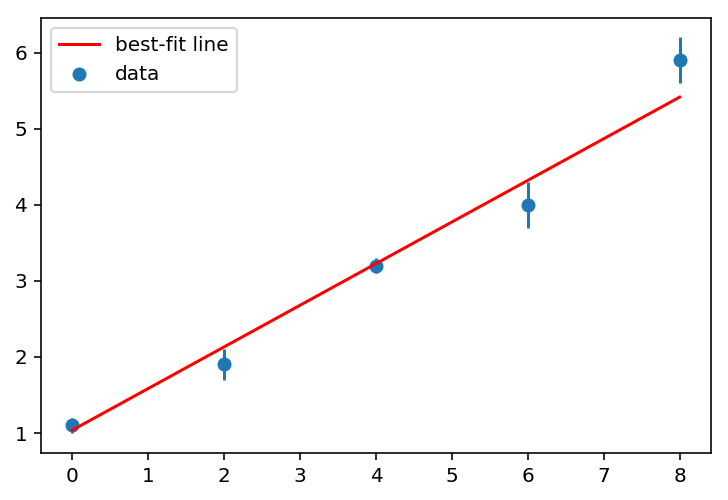

In [ ]:
xf = linspace(min(x),max(x),100)
yf = a*xf + b
figure()
scatter(x,y,label='data')  # plot data
errorbar(x, y, yerr, ls='None')  # add error bars to data
plot(xf,yf,"r-",label='best-fit line')  # plot best-fit line
legend(loc='upper left')
show()

An example of performing a linear fit with uncertainties in both the $x$ and $y$ directions is shown below. Arrays containing the data points ($x2$ and $y2$) and their uncertainties ($y2err$ and $x2err$) are sent to the function.  Note the order of the uncertainties!  The uncertainty in $x$ is optional, so it is second.  This is also consistent with the **`errorbar`** function (see below).

In [ ]:
from fitting import linear_fit
from pylab import *

# Test data and uncertainties
x2 = array([0.0, 0.9, 1.8, 2.6, 3.3, 4.4, 5.2, 6.1, 6.5, 7.4])
x2err = array([0.03162, 0.03162, 0.04472, 0.03536, 0.07071, 0.1118, 0.1291, 0.2236, 0.7454, 1.0])
y2 = array([5.9, 5.4, 4.4, 4.6, 3.5, 3.7, 2.8, 2.8, 2.4, 1.5])
y2err = array([1.0, 0.7454, 0.5, 0.3536, 0.2236, 0.2236, 0.1118, 0.1118, 0.1, 0.04472])

a2, b2, sa2, sb2, rchi2_2, dof2 = linear_fit(x2,y2,y2err,x2err)

print('y = ax + b')
print('a = ', a2, ' +/- ', sa2)
print('b = ', b2, ' +/- ', sb2)

results of linear_fit:
   reduced chi squared =  1.530628793165336
   degrees of freedom =  8
y = ax + b
a =  -0.480489311558  +/-  0.0714932577585
b =  5.47748933359  +/-  0.365002929412


Again, you should plot the data with error bars and a best-fit line together to see whether or not the fit is good. When plotting the data with errorbars in both directions, the array of uncertainties in the $y$ direction ($y2err$) comes before the array of uncertainties in the $x$ direction ($x2err$) in the  **`errorbar`** function. In this case, points were not plotted for the data because they would hide the smallest error bars.

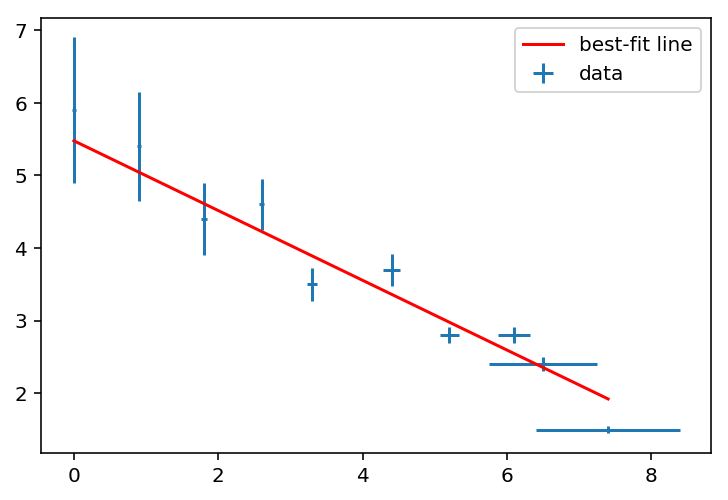

In [ ]:
x2f = linspace(min(x2),max(x2),100)
y2f = a2*x2f + b2
figure()
errorbar(x2, y2, y2err, x2err, ls='None', label='data')  # plot data w/o points since some error bars are small
plot(x2f,y2f,"r-",label='best-fit line')  # plot best-fit line
legend(loc='upper right')
show()

## 5.4 Interpreting the Results

It is possible to find the “best” line for your data, even when your data do not resemble a line at all. There is no substitute for actually looking at the graphed data to check that it looks like a reasonably straight line. For General Physics III (PHYS 233), visually checking that the best-fit line fits the data reasonably well is sufficient. Ideally, the line would pass through all of the error bars. For Advanced Experimental Phyiscs (PHYS 349), you should also look at the additional information returned by the fitting funciton.  

The reduced chi squared and the degrees of freedom can also be used to judge the goodness of the fit. If $N$ is the number of data points and $C$ is the number of parameters (or constraints) in the fit, the number degrees of freedom is  

$$
d = N - C.
$$  
For a linear fit, $C = 2$ because there two parameters for a line. The reduced chi squared is defined as  

$$
\tilde{\chi}^{\, 2} = \frac{\chi^2}{d}.
$$  
According to Taylor (p. 271), “If we obtain a value of $\tilde{\chi}^{\, 2}$ of order one or less, then we have no reason to doubt our expected distribution; if we obtain a value of $\tilde{\chi}^{\, 2}$ much larger than one, our expected distribution is unlikely to be correct.”  

For an observed value (from fitting data) of the reduced chi square ($\tilde{\chi}^{\, 2}_o$), you can look up the probability of randomly getting a larger $\tilde{\chi}^{\, 2}$ with $d$ degrees of freedom on the table below (from Appendix D of Taylor’s book). A typical standard is to reject a fit if  

$$
Prob_d\left(\tilde{\chi}^{\, 2} \ge \tilde{\chi}^{\, 2}_o \right) < 5\%.
$$  
In other words, if the reduced chi squared for a fit is unlikely to occur randomly, then the fit is not a good one.  
In the first example above, five data points are fit with a line (two fit parameters), so $d = 5 - 2 = 3$. The observed reduced chi squared is $\tilde{\chi}^{\, 2_o} = 1.85$, so the table gives  

$$
Prob_d\left(\tilde{\chi}^{\, 2} \ge \tilde{\chi}^{\, 2}_o \right) \approx 14\%,
$$  
and there is no reason to reject the fit.

<center>
<img src="https://dl.dropbox.com/s/no7cqn3z79hzb1u/ChiSqTable-Taylor.jpg" width=600>  
</center>  